In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,classification_report,roc_curve,auc

In [2]:
df=pd.read_csv('diabetes.csv')
df

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable (0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### Data preparation

In [3]:
# Missing values
print(df.isnull().sum())

Number of times pregnant                                                    0
Plasma glucose concentration a 2 hours in an oral glucose tolerance test    0
Diastolic blood pressure (mm Hg)                                            0
Triceps skin fold thickness (mm)                                            0
2-Hour serum insulin (mu U/ml)                                              0
Body mass index (weight in kg/(height in m)^2)                              0
Diabetes pedigree function                                                  0
Age (years)                                                                 0
Class variable (0 or 1)                                                     0
dtype: int64


Columns dont have missing values and there are not categorical columns to encode, so we can apply standartisation

In [4]:
# Applying standartisation
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [5]:
x_values=df.drop('Class variable (0 or 1)',axis=1)
y_values=df['Class variable (0 or 1)']

In [6]:
x_scaled=scaler.fit_transform(x_values)
x_scaled=pd.DataFrame(x_scaled)
x_scaled

,0,1,2,3,4,5,6,7
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732


In [7]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled.values,y_values.values,random_state=42,test_size=0.2)

### Pytorch neural network

In [8]:
# Converting numpy arrays into tensors
x_train_tensor=torch.tensor(x_train,dtype=torch.float32)
x_test_tensor=torch.tensor(x_test,dtype=torch.float32)
y_train_tensor=torch.tensor(y_train,dtype=torch.float32).unsqueeze(1)
y_test_tensor=torch.tensor(y_test,dtype=torch.float32).unsqueeze(1)

In [9]:
# Class for neural network
class BinaryClasssificationNN(nn.Module):
    def __init__(self,input_size,hidden_size,output_size):
        super(BinaryClasssificationNN,self).__init__()
        self.hidden_layer=nn.Linear(input_size,hidden_size)
        self.output_layer=nn.Linear(hidden_size,output_size)
        self.relu=nn.ReLU()
        self.sigmoid=nn.Sigmoid()

    def forward(self,x):
        x=self.hidden_layer(x)
        x=self.relu(x)
        x=self.output_layer(x)
        x=self.sigmoid(x)
        return x

In [10]:
input_size=x_train_tensor.shape[1]
hidden_size=8
output_size=1
learning_rate=0.01
n_epochs=1000

model=BinaryClasssificationNN(input_size,hidden_size,output_size)
criterion=nn.BCELoss()
optimizer=optim.Adam(model.parameters(),lr=learning_rate)
losses=[]
accurasies=[]

In [11]:
for epoch in range(n_epochs):
    outputs=model(x_train_tensor)
    loss=criterion(outputs,y_train_tensor)
    losses.append(loss.item())

    preds=(outputs.detach().numpy()>0.5).astype(int)
    y_train_numpy=y_train_tensor.numpy()
    acc=accuracy_score(y_train_numpy,preds)
    accurasies.append(acc)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (epoch+1)%100==0:
        print(f'Epoch: {epoch+1} | loss: {loss.item():.4f} | accuracy: {acc:.4f}')

Epoch: 100 | loss: 0.4370 | accuracy: 0.7818
Epoch: 200 | loss: 0.4082 | accuracy: 0.8127
Epoch: 300 | loss: 0.3877 | accuracy: 0.8257
Epoch: 400 | loss: 0.3780 | accuracy: 0.8241
Epoch: 500 | loss: 0.3754 | accuracy: 0.8257
Epoch: 600 | loss: 0.3740 | accuracy: 0.8241
Epoch: 700 | loss: 0.3734 | accuracy: 0.8192
Epoch: 800 | loss: 0.3716 | accuracy: 0.8208
Epoch: 900 | loss: 0.3714 | accuracy: 0.8257
Epoch: 1000 | loss: 0.3713 | accuracy: 0.8306


test loss: 0.6368 | test accuracy: 0.7078
              precision    recall  f1-score   support

     Class 0       0.77      0.78      0.77        99
     Class 1       0.59      0.58      0.59        55

    accuracy                           0.71       154
   macro avg       0.68      0.68      0.68       154
weighted avg       0.71      0.71      0.71       154



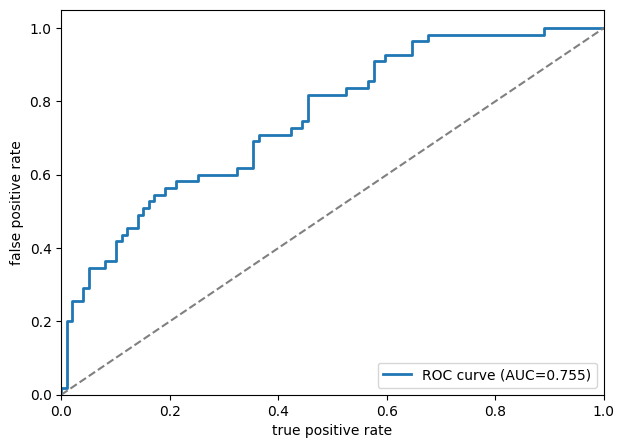

In [12]:
model.eval()
with torch.no_grad():
    outputs=model(x_test_tensor)
    test_loss=criterion(outputs,y_test_tensor)
    test_preds=(outputs.numpy()>0.5).astype(int)
    y_test_numpy=y_test_tensor.numpy()
    test_acc=accuracy_score(y_test_numpy,test_preds)
    print(f'test loss: {test_loss:.4f} | test accuracy: {test_acc:.4f}')
    print(classification_report(y_test_numpy,test_preds,target_names=['Class 0','Class 1']))
    y_proba=outputs.numpy()
    fpr,tpr,_=roc_curve(y_test_numpy,y_proba)
    roc_auc=auc(fpr,tpr)

    plt.figure(figsize=(7,5))
    plt.plot(fpr,tpr,lw=2,label=f'ROC curve (AUC={roc_auc:.3f})')
    plt.plot([0,1],[0,1],color='grey',linestyle='--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('true positive rate')
    plt.ylabel('false positive rate')
    plt.legend(loc='lower right')
    plt.show()

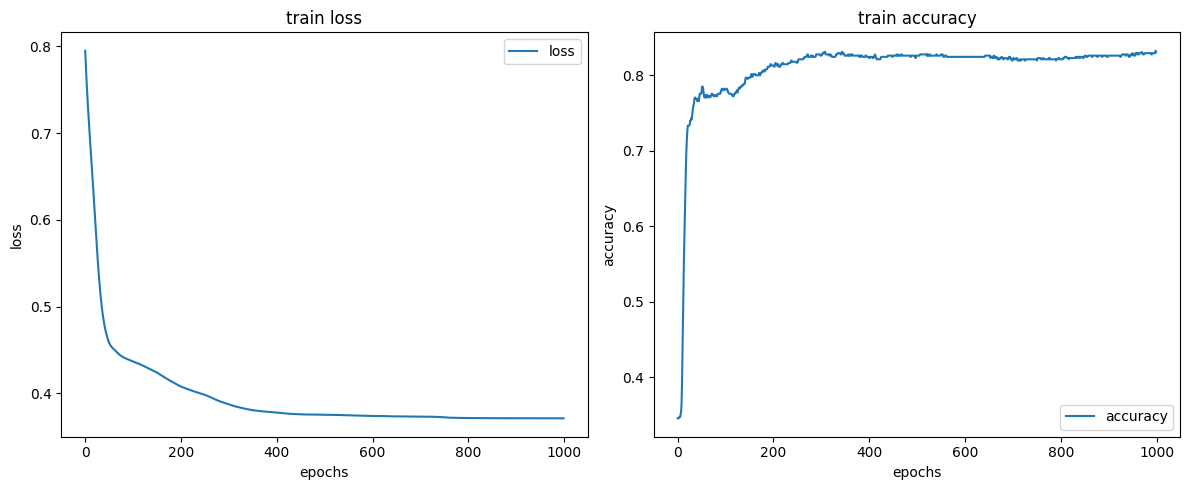

In [13]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(range(n_epochs),losses,label='loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('train loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(n_epochs),accurasies,label='accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('train accuracy')
plt.legend()

plt.tight_layout()
plt.show()